In [228]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
from numpy import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline

In [230]:
'''Import the data that will be analyse'''
df = pd.read_csv('DATA/all_perth_310121.csv')

In [231]:
df.shape

(33656, 19)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [233]:
df.isnull().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [234]:
100 * df.isnull().sum() / len(df)

ADDRESS              0.000000
SUBURB               0.000000
PRICE                0.000000
BEDROOMS             0.000000
BATHROOMS            0.000000
GARAGE               7.362729
LAND_AREA            0.000000
FLOOR_AREA           0.000000
BUILD_YEAR           9.374257
CBD_DIST             0.000000
NEAREST_STN          0.000000
NEAREST_STN_DIST     0.000000
DATE_SOLD            0.000000
POSTCODE             0.000000
LATITUDE             0.000000
LONGITUDE            0.000000
NEAREST_SCH          0.000000
NEAREST_SCH_DIST     0.000000
NEAREST_SCH_RANK    32.541003
dtype: float64

In [235]:
sns.set_theme(style="whitegrid")

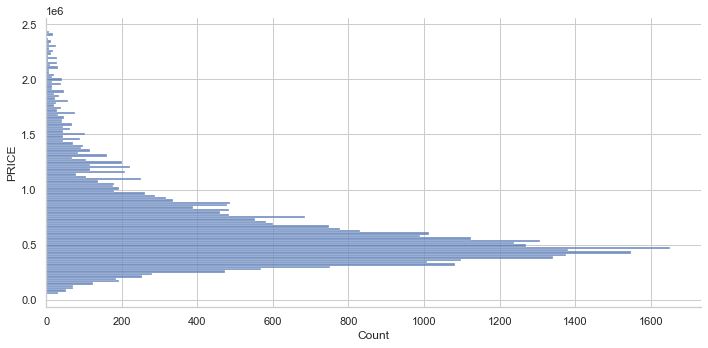

In [236]:
sns.displot(df, y='PRICE', height=5,aspect=2)

<AxesSubplot:xlabel='PRICE'>

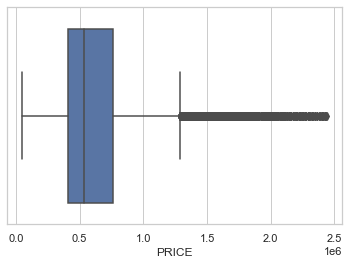

In [237]:
sns.boxplot(x=df["PRICE"])

Text(0.5, 1.0, 'Number of BEDROOMS to PRICE')

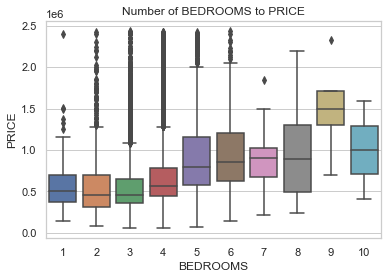

In [238]:
sns.boxplot(x="BEDROOMS", y="PRICE", data=df).set_title('Number of BEDROOMS to PRICE')

<AxesSubplot:xlabel='GARAGE'>

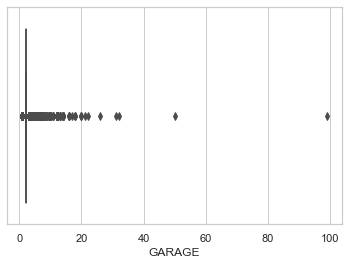

In [239]:
sns.boxplot(x=df['GARAGE'])

<AxesSubplot:xlabel='PRICE', ylabel='FLOOR_AREA'>

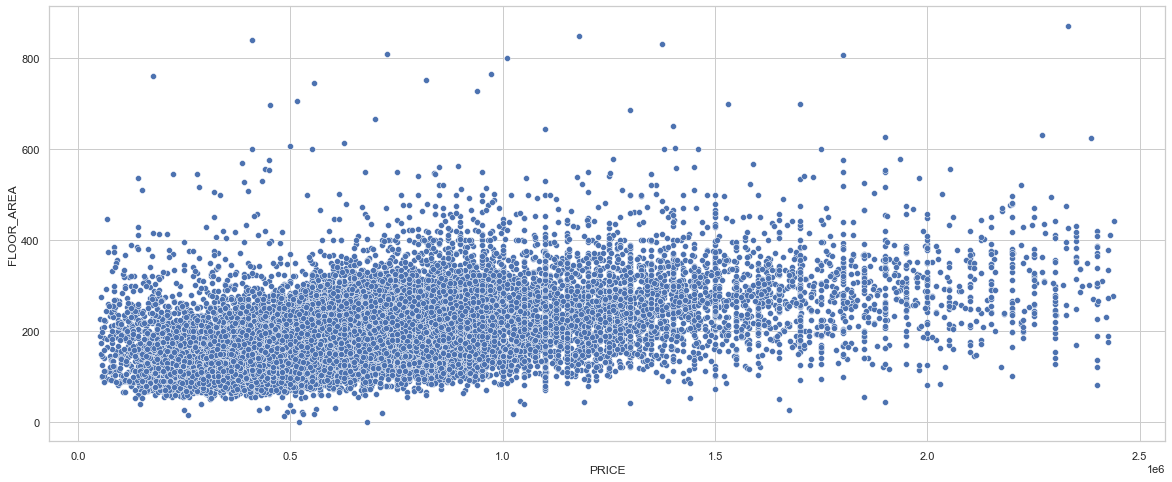

In [240]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='PRICE', y='FLOOR_AREA', data=df)

<AxesSubplot:xlabel='PRICE', ylabel='LONGITUDE'>

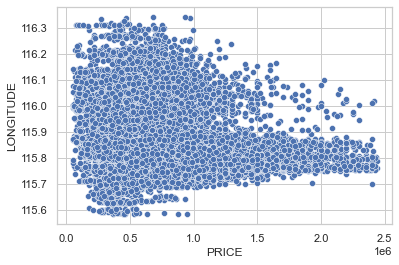

In [241]:
sns.scatterplot(x='PRICE', y='LONGITUDE', data=df)

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

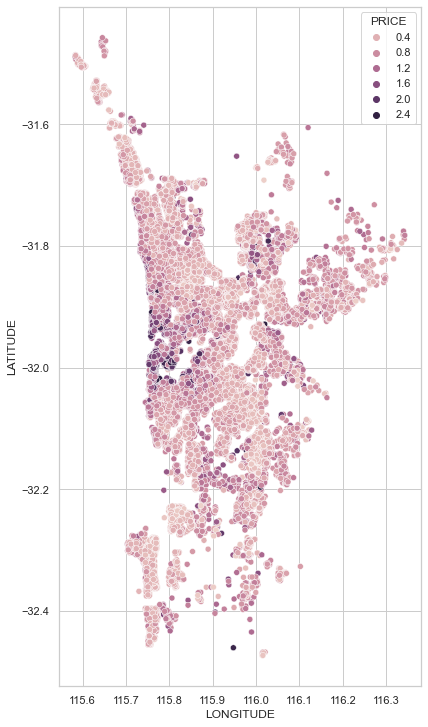

In [242]:
plt.figure(figsize=(6.5,12.5))
sns.scatterplot(data=df, x='LONGITUDE', y='LATITUDE', hue='PRICE')

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

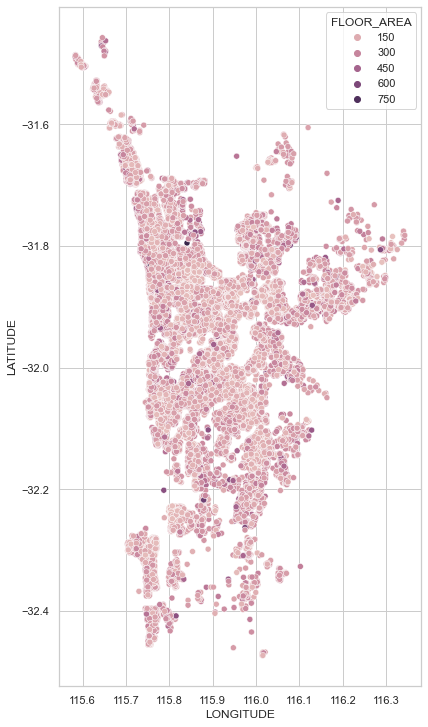

In [243]:
plt.figure(figsize=(6.5,12.5))
sns.scatterplot(data=df, x='LONGITUDE', y='LATITUDE', hue='FLOOR_AREA')

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

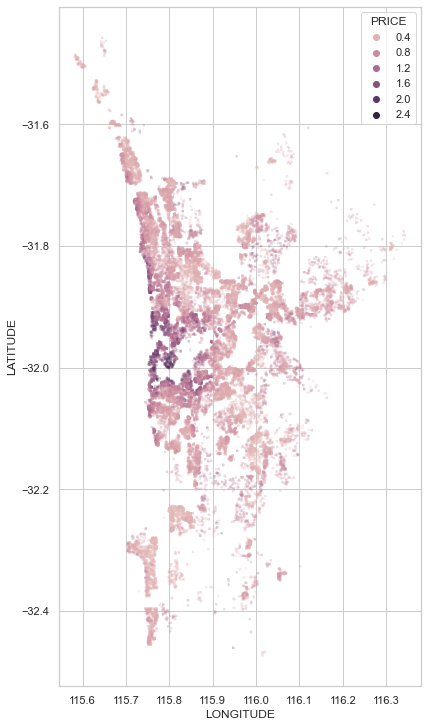

In [244]:
plt.figure(figsize=(6.5,12.5))
sns.scatterplot(data=df, x='LONGITUDE', y='LATITUDE', hue='PRICE',s=10,marker="+")

In [245]:
income = pd.read_csv('DATA/suburb_Weekly_income.csv')
income_index = income.set_index('Suburb')
income_dict = income_index['Weekly Income'].to_dict()
df['INCOME_SUBURB'] = df['SUBURB'].map(income_dict)

In [246]:
df[df.duplicated(keep=False)].count()

ADDRESS             0
SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN         0
NEAREST_STN_DIST    0
DATE_SOLD           0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
NEAREST_SCH_RANK    0
INCOME_SUBURB       0
dtype: int64

In [247]:
income = pd.read_csv('DATA/suburb_Weekly_income.csv')
income_index = income.set_index('Suburb')
income_dict = income_index['Weekly Income'].to_dict()
df['INCOME_SUBURB'] = df['SUBURB'].map(income_dict)

In [248]:
df['INCOME_SUBURB']

0        1850.0
1           NaN
2           NaN
3           NaN
4        1214.0
          ...  
33651    1195.0
33652    1042.0
33653    1042.0
33654    1173.0
33655    1228.0
Name: INCOME_SUBURB, Length: 33656, dtype: float64

In [249]:
df['GARAGE'] = df['GARAGE'].fillna(0)

In [250]:
df['GARAGE'].sort_values(ascending=False)

17286    99.0
30286    50.0
2122     32.0
32789    31.0
25632    26.0
         ... 
8042      0.0
21724     0.0
31040     0.0
21727     0.0
14456     0.0
Name: GARAGE, Length: 33656, dtype: float64

In [251]:
x =  df['GARAGE']

In [252]:
df['GARAGE'] = x[x.between(x.quantile(.0), x.quantile(.98))]

In [253]:
df['GARAGE'].sort_values(ascending=False)

10039    6.0
14788    6.0
29964    6.0
22970    6.0
18960    6.0
        ... 
33256    NaN
33433    NaN
33454    NaN
33505    NaN
33510    NaN
Name: GARAGE, Length: 33656, dtype: float64

In [254]:
df['GARAGE'] = df['GARAGE'].fillna(0)

In [255]:
df['GARAGE'].sort_values(ascending=False)

15130    6.0
2703     6.0
22261    6.0
8327     6.0
1241     6.0
        ... 
31496    0.0
2440     0.0
8728     0.0
25896    0.0
6272     0.0
Name: GARAGE, Length: 33656, dtype: float64

In [258]:
#Vatiance elements
df.drop(labels=['ADDRESS', 'SUBURB', 'NEAREST_STN', 'NEAREST_SCH_RANK', 'DATE_SOLD', 'NEAREST_SCH'], axis=1,
                inplace=True)

In [274]:
df.fillna(df.mean(), inplace=True)


In [275]:
sns.set(rc={'figure.figsize': (10, 5)})

X = df.drop('PRICE', axis=1).values
y = df['PRICE'].values

In [276]:
 elements = df.drop('PRICE',  axis=1).columns

In [277]:
 elements

Index(['BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE',
       'LONGITUDE', 'NEAREST_SCH_DIST', 'INCOME_SUBURB'],
      dtype='object')

In [278]:
lasso = Lasso(alpha=1)

In [280]:
np.any(np.isnan(X))
np.any(np.isnan(y))

False

In [281]:
lasso_coef = lasso.fit(X, y).coef_

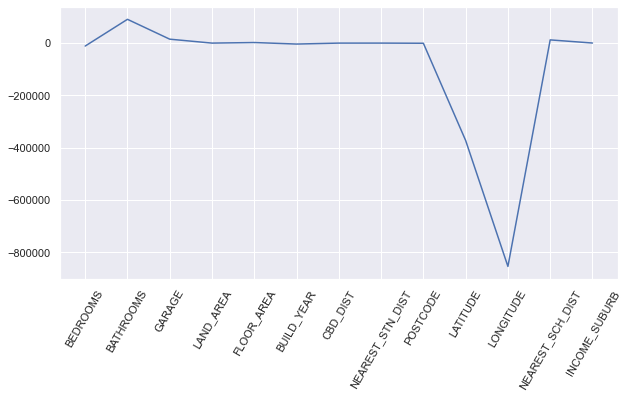

In [282]:
_ = plt.plot(range(len(elements)), lasso_coef)
_ = plt.xticks(range(len(elements)), elements, rotation=60)

In [284]:
X = df.drop('PRICE', axis=1)
y = df['PRICE']

In [285]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [286]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [287]:
model = keras.Sequential(
            [
            layers.Dense(336, activation='relu', name="layer1"),
            layers.Dense(168, activation='relu', name="layer2"),
            layers.Dense(84, activation='relu', name="layer3"),
            layers.Dense(42, activation='relu', name="layer4"),
            layers.Dense(21, activation='relu', name="layer5"),
            ]
        )

In [288]:
model.add(Dense(1))

In [289]:
model.compile(optimizer='adam', loss='mse')

In [290]:
 #Stop so not to overfit
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [291]:
model.fit(x=X_train, y=y_train,
                  validation_data=(X_test, y_test),
                  batch_size=128, epochs=400,
                  verbose=1,
                  callbacks=[early_stop])

Epoch 1/600
185/185 [==============================] - 1s 4ms/step - loss: 500555762258.5806 - val_loss: 70488522752.0000
Epoch 2/600
185/185 [==============================] - 0s 3ms/step - loss: 61571472417.0323 - val_loss: 54342344704.0000
Epoch 3/600
185/185 [==============================] - 1s 3ms/step - loss: 50228260423.5699 - val_loss: 48451940352.0000
Epoch 4/600
185/185 [==============================] - 1s 3ms/step - loss: 43983275877.8495 - val_loss: 45085093888.0000
Epoch 5/600
185/185 [==============================] - 0s 3ms/step - loss: 42800245308.5591 - val_loss: 43695149056.0000
Epoch 6/600
185/185 [==============================] - 1s 3ms/step - loss: 40310640265.6344 - val_loss: 42607824896.0000
Epoch 7/600
185/185 [==============================] - 1s 3ms/step - loss: 40161935360.0000 - val_loss: 41739874304.0000
Epoch 8/600
185/185 [==============================] - 0s 2ms/step - loss: 38192078693.8495 - val_loss: 41319088128.0000
Epoch 9/600
185/185 [==========

185/185 [==============================] - 0s 2ms/step - loss: 29080228478.6237 - val_loss: 31293952000.0000
Epoch 69/600
185/185 [==============================] - 0s 2ms/step - loss: 28580703859.6129 - val_loss: 31630268416.0000
Epoch 70/600
185/185 [==============================] - 0s 2ms/step - loss: 28663729174.0215 - val_loss: 31890362368.0000
Epoch 71/600
185/185 [==============================] - 0s 2ms/step - loss: 28361760668.9032 - val_loss: 32162043904.0000
Epoch 72/600
185/185 [==============================] - 0s 2ms/step - loss: 28812555605.3333 - val_loss: 31905050624.0000
Epoch 73/600
185/185 [==============================] - 0s 2ms/step - loss: 27831424605.5914 - val_loss: 31710961664.0000
Epoch 74/600
185/185 [==============================] - 0s 2ms/step - loss: 29131690732.7312 - val_loss: 31258828800.0000
Epoch 75/600
185/185 [==============================] - 1s 3ms/step - loss: 27584505195.3548 - val_loss: 31430105088.0000
Epoch 76/600
185/185 [===============

Epoch 135/600
185/185 [==============================] - 0s 2ms/step - loss: 24989695537.5484 - val_loss: 29599668224.0000
Epoch 136/600
185/185 [==============================] - 0s 2ms/step - loss: 24403234860.0430 - val_loss: 29498284032.0000
Epoch 137/600
185/185 [==============================] - 0s 2ms/step - loss: 25085026083.7849 - val_loss: 30269978624.0000
Epoch 138/600
185/185 [==============================] - 0s 2ms/step - loss: 24910911730.2366 - val_loss: 29159628800.0000
Epoch 139/600
185/185 [==============================] - 0s 2ms/step - loss: 24167966301.5914 - val_loss: 29468817408.0000
Epoch 140/600
185/185 [==============================] - 1s 3ms/step - loss: 24532524351.3118 - val_loss: 29450967040.0000
Epoch 141/600
185/185 [==============================] - 0s 2ms/step - loss: 24359049986.7527 - val_loss: 30820927488.0000
Epoch 142/600
185/185 [==============================] - 0s 3ms/step - loss: 26711049612.3871 - val_loss: 29688338432.0000
Epoch 143/600
18

<AxesSubplot:>

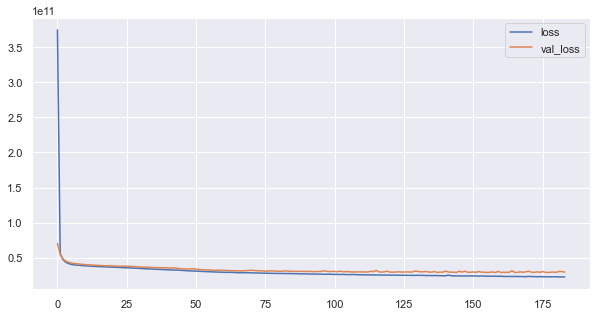

In [292]:
 losses = pd.DataFrame(model.history.history)
 losses.plot()   

In [293]:
y_pred = model.predict(X_test)

In [294]:
model.pop()

In [295]:
print(len(model.layers))

5


In [296]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 336)               4704      
_________________________________________________________________
layer2 (Dense)               (None, 168)               56616     
_________________________________________________________________
layer3 (Dense)               (None, 84)                14196     
_________________________________________________________________
layer4 (Dense)               (None, 42)                3570      
_________________________________________________________________
layer5 (Dense)               (None, 21)                903       
Total params: 79,989
Trainable params: 79,989
Non-trainable params: 0
_________________________________________________________________
